In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)


[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


# Measures Of Central Tendency

# Mean

In [4]:
mean_ = sum(x) / len(x)
mean_

8.7

In [5]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [6]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [7]:
mean_ = np.mean(y)
mean_

8.7

In [8]:
mean_ = y.mean()
mean_

8.7

In [9]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [10]:
np.nanmean(y_with_nan)

8.7

In [11]:
mean_ = z.mean()
mean_

8.7

In [12]:
z_with_nan.mean()

8.7

# Weighted Mean

In [13]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


In [14]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [15]:
(w * y).sum() / w.sum()

6.95

# Harmonic Mean

In [16]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [17]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [19]:
scipy.stats.hmean(y)

2.7613412228796843

In [20]:
scipy.stats.hmean(z)

2.7613412228796843

# Geometric Mean

In [21]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [22]:
scipy.stats.gmean(y)

4.67788567485604

In [23]:
scipy.stats.gmean(z)

4.67788567485604

# Median

In [24]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [25]:
print(sorted(x[:-1]))
print(statistics.median_low(x[:-1]))
print(statistics.median_high(x[:-1]))

[1, 2.5, 4, 8.0]
2.5
4


In [26]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [27]:
sorted(x_with_nan)

[1, 2.5, 4, 8.0, nan, 28.0]

In [28]:
median_ = np.median(y)
print(median_)

4.0


In [29]:
median_ = np.median(y[:-1])
print(median_)

3.25


In [30]:
z.median()

4.0

# Mode

In [31]:
u = [2, 3, 2, 8, 12, 3, 3, 3]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

3

In [32]:
max((u.count(item), item) for item in set(u))

(4, 3)

In [33]:
mode_ = statistics.mode(u)
mode_

3

In [34]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
print(mode_)

ModeResult(mode=array([3]), count=array([4]))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11524\3113262755.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(u)


In [35]:
mode_ = scipy.stats.mode(v)
mode_

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11524\4273125489.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(v)


ModeResult(mode=array([12]), count=array([3]))

In [36]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [37]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    3
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


# Measures of Variability
# Variance

In [38]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [39]:
var_ = statistics.variance(x)
var_

pvar_ = statistics.pvariance(x) 
pvar_

98.56

In [40]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [41]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [42]:
z.var(ddof=1)

123.19999999999999

# Standard Deviation

In [43]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [44]:
std_ = statistics.stdev(x)
std_

pstd_ = statistics.pstdev(x) 
pstd_

9.927738916792686

In [46]:
np.std(y, ddof=1)

11.099549540409285

In [47]:
y.std(ddof=1)

11.099549540409285

In [48]:
np.nanstd(y_with_nan, ddof=1)

11.099549540409285

In [45]:
z.std()

11.099549540409285

# Skewness

In [49]:
n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))
skew_

1.9470432273905929

In [50]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [51]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y_with_nan, bias=False)

nan

In [52]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [53]:
z_with_nan.skew()

1.9470432273905924

# Percentiles

In [54]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]

In [55]:
statistics.quantiles(x, n=2)

[8.0]

In [56]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [57]:
y = np.array(x)
print(np.percentile(y, 5))
np.percentile(y, 95)

-3.44


34.919999999999995

In [58]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [59]:
y_with_nan = np.insert(y, 2, np.nan)
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [60]:
np.quantile(y, 0.05)

-3.44

In [61]:
np.quantile(y, 0.95)

34.919999999999995

In [62]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [63]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [64]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)

In [65]:
z.quantile(0.05)

-3.44

In [66]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [67]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

# Ranges

In [68]:
np.ptp(y)
np.ptp(z)
np.ptp(y_with_nan)
np.ptp(z_with_nan)

nan

In [69]:
np.amax(y) - np.amin(y)
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)
z_with_nan.max() - z_with_nan.min()

46.0

# Interquartile range

In [70]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [71]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

# Summary of Descriptive Statistics

In [72]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [73]:
result.nobs

9

In [74]:
result.minmax[0]
result.minmax[1]

41.0

In [75]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [76]:
result['count']
result['max']

41.0

# Measures of Correlation Between Pairs of Data

In [77]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

# Covariance

In [78]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy

19.95

In [79]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [80]:
x_.var(ddof=1)
y_.var(ddof=1)

13.914285714285711

In [81]:
cov_xy = x__.cov(y__)
>>> cov_xy
cov_xy = y__.cov(x__)
>>> cov_xy

19.95

# Correlation Coefficient

In [82]:
>>> var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
>>> var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
>>> std_x, std_y = var_x ** 0.5, var_y ** 0.5
>>> r = cov_xy / (std_x * std_y)
>>> r

0.861950005631606

In [83]:
>>> r, p = scipy.stats.pearsonr(x_, y_)
>>> r
# >>> p

0.861950005631606

In [84]:
corr_matrix = np.corrcoef(x_, y_)
>>> corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [85]:
result = scipy.stats.linregress(x_, y_)
result

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [86]:
result.slope

0.5181818181818181

In [87]:
r = y__.corr(x__)
>>> r

0.861950005631606

# Working With 2D Data

In [88]:
a = np.array([[1, 1, 1],
...               [2, 3, 1],
...               [4, 9, 2],
...               [8, 27, 4],
...               [16, 1, 1]])
>>> a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [89]:
a.mean()

5.4

In [90]:
np.median(a)

2.0

In [91]:
a.var(ddof=1)

53.40000000000001

In [92]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [93]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [94]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [95]:
np.median(a, axis=0)

array([4., 3., 1.])

In [96]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [97]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [98]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [99]:
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [100]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [101]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [102]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [103]:
scipy.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

# Dataframes

In [146]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
>>> col_names = ['A', 'B', 'C']
>>> df = pd.DataFrame(a, index=row_names, columns=col_names)
>>> df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [147]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [149]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [151]:
df.mean(axis = 1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [152]:
df['A'].mean()

6.2

In [153]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [154]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [155]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [156]:
df.describe().at['mean','A']

6.2

# Visualizing Data

In [157]:
import matplotlib.pyplot as plt
>>> plt.style.use('ggplot')

# Box Plot

In [158]:
np.random.seed(seed=0)
>>> x = np.random.randn(1000)
>>> y = np.random.randn(100)
>>> z = np.random.randn(10)

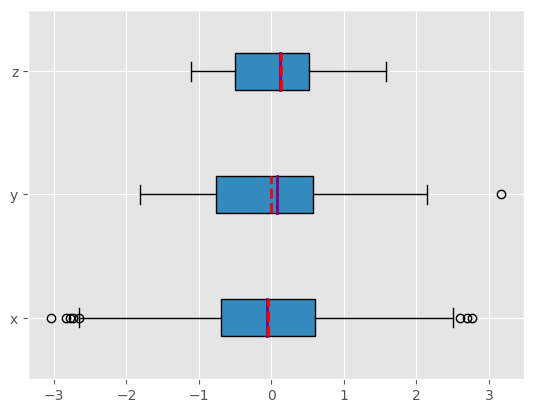

In [159]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,           
           medianprops={'linewidth': 2, 'color': 'purple'},           
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

# Histogram

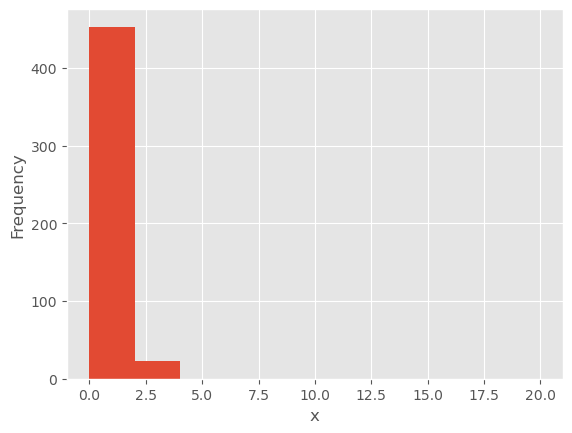

In [160]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

In [161]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

In [162]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

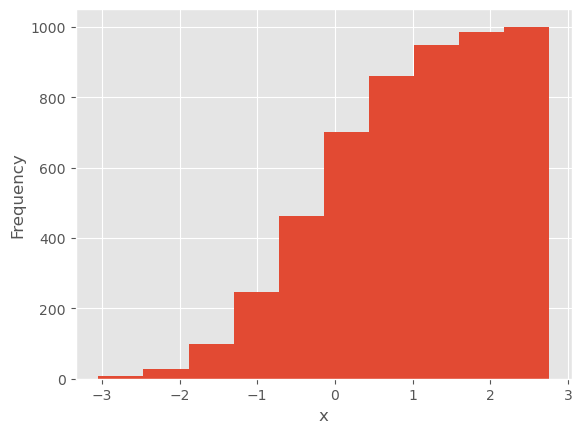

In [163]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

# Pie Chart

In [164]:
x, y, z = 128, 256, 1024

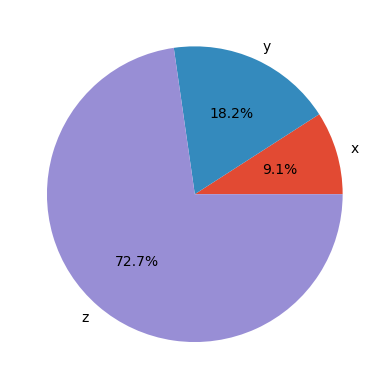

In [165]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

 # Pie Chart

In [166]:
x = np.arange(21)
>>> y = np.random.randint(21, size=21)
>>> err = np.random.randn(21)
err

array([-0.80656479,  2.01621342, -0.30215182,  0.67375184,  1.66826442,
       -2.9163849 ,  0.43166367, -0.72905029,  0.11509943,  0.3143407 ,
        0.03632548,  0.53540839, -0.50008969,  1.20285171, -1.25813641,
       -1.51082149, -1.23405636,  1.38609134, -0.29442511, -1.50657565,
       -0.46735128])

ValueError: 'yerr' must not contain negative values

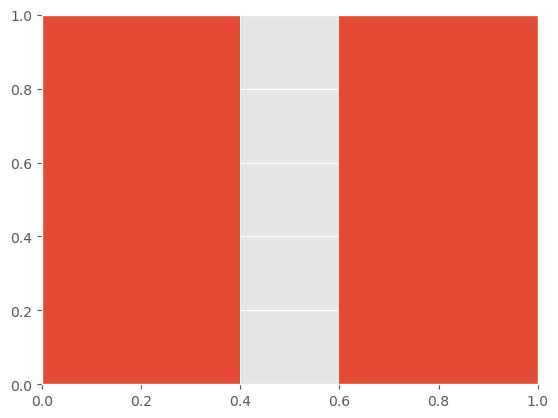

In [167]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# Scatterplots

In [168]:
x = np.arange(21)
>>> y = 5 + 2 * x + 2 * np.random.randn(21)
>>> slope, intercept, r, *__ = scipy.stats.linregress(x, y)
>>> line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

In [169]:
line

'Regression line: y=5.49+2.02x, r=0.99'

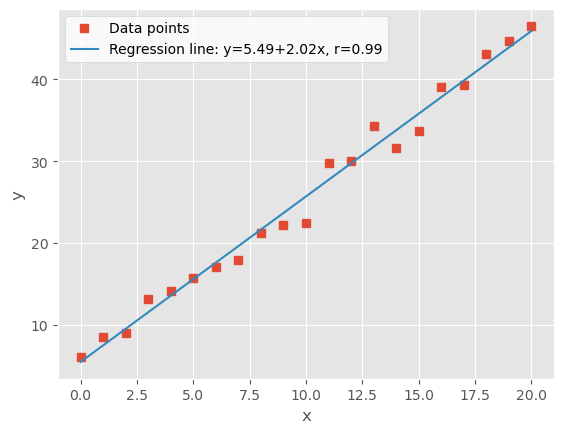

In [170]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

In [ ]:
## Heatmap

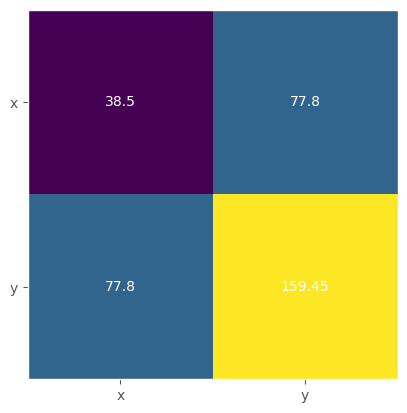

In [171]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

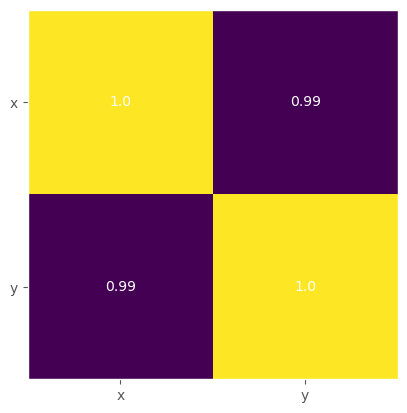

In [172]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()